# Project - Term Deposit Sale


### Goal:

Using the data collected from existing customers, build a model that will help the marketing
team identify potential customers who are relatively more likely to subscribe term deposit
and thus increase their hit ratio.
 

### Attribute Information:

Input variables:

    Bank client data:
        1. age: Continuous feature
        2. job: Type of job (management, technician, entrepreneur, blue-collar, etc.)
        3. marital: marital status (married, single, divorced)
        4. education: education level (primary, secondary, tertiary)
        5. default: has credit in default?
        6. housing: has housing loan?
        7. loan: has personal loan?
        8. balance in account
    Related to previous contact:
        9. contact: contact communication type
        10. month: last contact month of year
        11. day: last contact day of the month
        12. duration: last contact duration, in seconds*
    Other attributes:
        13. campaign: number of contacts performed during this campaign and for this
            client
        14. pdays: number of days that passed by after the client was last contacted from a
            previous campaign (-1 tells us the person has not been contacted or contact
            period is beyond 900 days)
        15. previous: number of times the client has been contacted before for the last
            campaign to subscribe term deposit
        16. poutcome: outcome of the previous marketing campaign
    Output variable (desired target):
        17. Target: Tell us has the client subscribed a term deposit. (Yes, No)

## Deliverable – 1 (Exploratory data quality report reflecting the following) – (20)

### 1. Univariate analysis (12 marks)
- Univariate analysis – data types and description of the independent attributes which should include (name, meaning, range of values observed, central values (mean and median), standard deviation and quartiles, analysis of the body of distributions / tails, missing values, outliers.
- Strategies to address the different data challenges such as data pollution, outlier’s treatment and missing values treatment
- Please provide comments in jupyter notebook regarding the steps you take and insights drawn from the plots.

In [1]:
#Import warnings
import warnings
warnings.filterwarnings('ignore')

In [1]:
#Load libraries
import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Remove scientific notations and display numbers with 2 decimal points instead
pd.options.display.float_format = '{:,.2f}'.format

In [3]:
#Import data
data = pd.read_csv('bank-full.csv')

In [4]:
#Peak at the data
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [5]:
#Check datatypes
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  Target     45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [6]:
#Get some basic information on the data
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,"45,211.00",40.94,10.62,18.00,33.00,39.00,48.00,95.00
balance,"45,211.00","1,362.27","3,044.77","-8,019.00",72.00,448.00,"1,428.00","102,127.00"
day,"45,211.00",15.81,8.32,1.00,8.00,16.00,21.00,31.00
duration,"45,211.00",258.16,257.53,0.00,103.00,180.00,319.00,"4,918.00"
campaign,"45,211.00",2.76,3.10,1.00,1.00,2.00,3.00,63.00
pdays,"45,211.00",40.20,100.13,-1.00,-1.00,-1.00,-1.00,871.00
previous,"45,211.00",0.58,2.30,0.00,0.00,0.00,0.00,275.00


In [7]:
#Number of rows and columns
data.shape

(45211, 17)

In [8]:
#Check if there are any null values
data.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
Target       0
dtype: int64

In [9]:
#Show the count of unique values in each column
data.nunique()

age            77
job            12
marital         3
education       4
default         2
balance      7168
housing         2
loan            2
contact         3
day            31
month          12
duration     1573
campaign       48
pdays         559
previous       41
poutcome        4
Target          2
dtype: int64

In [10]:
#Number of people who subscribed to term deposit or not
data["Target"].value_counts()

no     39922
yes     5289
Name: Target, dtype: int64

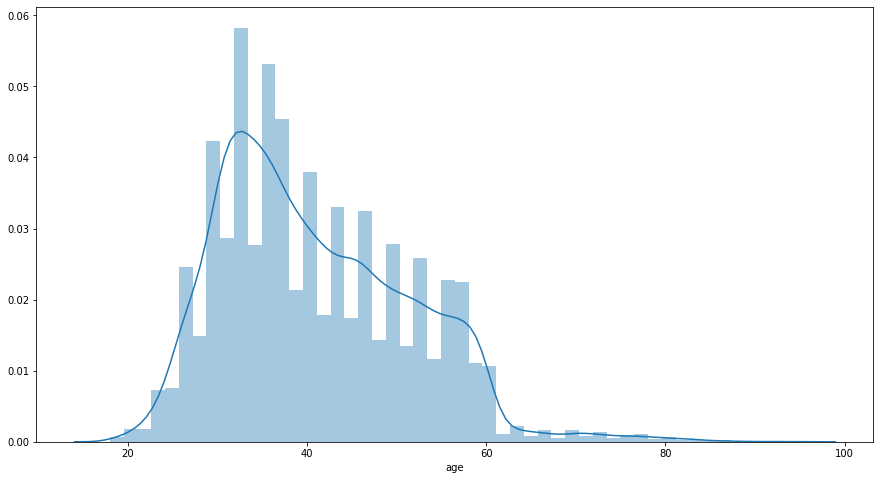

In [11]:
#Checking client age range of data
plt.figure(figsize=(15,8))
sns.distplot(data['age'])
plt.show()

<AxesSubplot:xlabel='education', ylabel='count'>

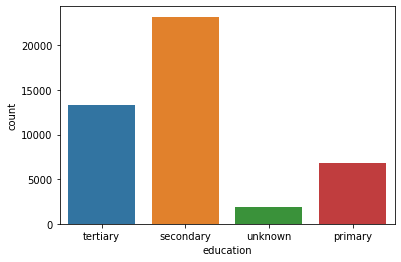

In [12]:
#Looking at education levels of clients
sns.countplot(data['education'])

In [13]:
#Count values of education levels
data["education"].value_counts()

secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64

**Insights:** `We know most of the clients' education levels. Only about 4% of clients' education is unknown.`

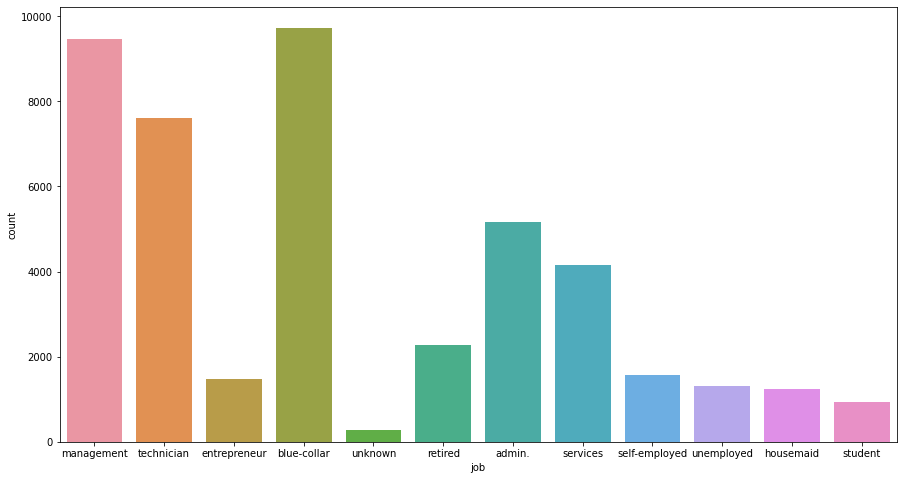

In [14]:
#Looking at job counts of clients
plt.figure(figsize=(15,8))
sns.countplot(data['job'])
plt.show()

In [15]:
#Count values of client occupation
data["job"].value_counts()

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

**Insights:** `We have most of the clients' profession information. Less than 1% of clients' occupation is listed as unknown.`

<AxesSubplot:xlabel='housing', ylabel='count'>

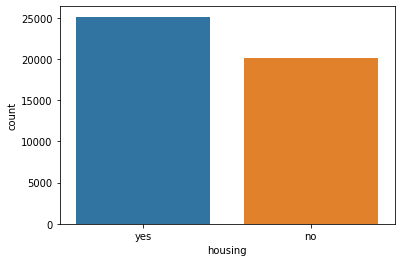

In [16]:
#Plot of those with housing loans
sns.countplot(data['housing'])

In [17]:
#Count values of clients with housing loan
data["housing"].value_counts()

yes    25130
no     20081
Name: housing, dtype: int64

<AxesSubplot:xlabel='loan', ylabel='count'>

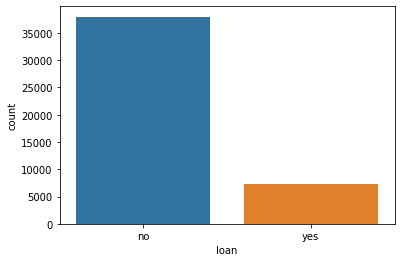

In [18]:
#Plot of those with personal loans
sns.countplot(data['loan'])

**Insights:** `The percentage between clients' with and without a housing loan is close. But a lot less clients have personal loans.`

### 2. Multivariate analysis (8 marks)
- Bi-variate analysis between the predictor variables and target column. Comment on your findings in terms of their relationship and degree of relation if any. Visualize the analysis using boxplots and pair plots, histograms or density curves. Select the most appropriate attributes.
- Please provide comments in jupyter notebook regarding the steps you take and insights drawn from the plots

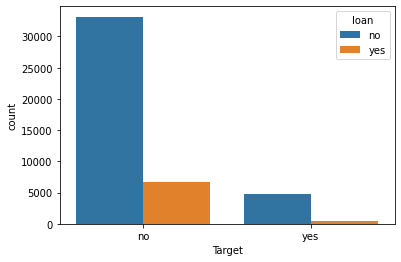

In [19]:
#Check correlation between having a personal loan and Target value
sns.countplot(data['Target'],hue=data['loan']);

**Insights:** `Of those who would have a term deposit, more are likely to not have a personal loan.`

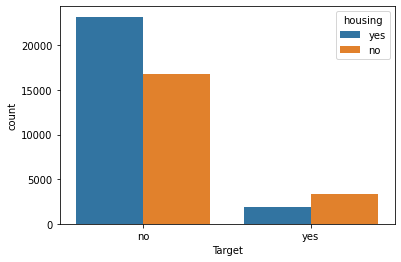

In [20]:
#Check correlation between having a personal loan and Target value
sns.countplot(data['Target'],hue=data['housing']);

**Insights:** `Of those who would have a term deposit, more are likely to not have a housing loan.`

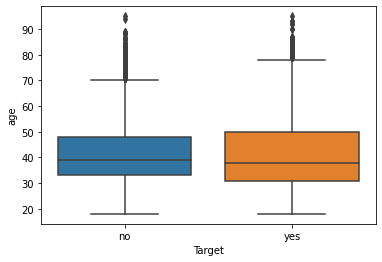

In [21]:
#Correlation between age and Target
sns.boxplot(data['Target'], data['age']);

**Insights:** `It seems as though age doesn't have a strong affect on the Target`

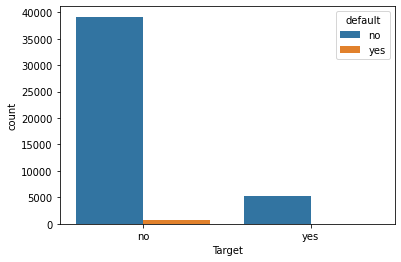

In [22]:
#Count of default against Target
sns.countplot(data['Target'],hue=data['default']);

**Insights:** `Of those who would have a term deposit most have not defaulted on a loan.`

## Deliverable – 2 (Prepare the data for analytics) – (10)
1. Ensure the attribute types are correct. If not, take appropriate actions.
2. Get the data model ready.
3. Transform the data i.e. scale / normalize if required
4. Create the training set and test set in ratio of 70:30

In [23]:
#Replacing object values for int values
replaceStruct = {
                "education": {"primary": 1,"secondary": 2, "tertiary": 3, "unknown":-1},
                "housing": {"no": 0, "yes": 1},
                 "loan": {"no": 0, "yes":1},
                 "month": {"jan": 1, "feb": 2, "mar": 3,"apr": 4,"may": 5, "jun": 6, 
                           "jul": 7 ,"aug": 8, "sep": 9,"oct": 10, "nov": 11, "dec": 12},
                "phone": {"no": 1, "yes": 2 },
                "default": {"no": 0, "yes": 1 },
                "Target": {"no": 0, "yes": 1}
                }

oneHotCols=["job", "marital", "contact","poutcome"]

In [24]:
prep_data=data.replace(replaceStruct)
prep_data=pd.get_dummies(prep_data, columns=oneHotCols)
prep_data.head(10)

,age,education,default,balance,housing,loan,day,month,duration,campaign,...,marital_divorced,marital_married,marital_single,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,58,3,0,2143,1,0,5,5,261,1,...,0,1,0,0,0,1,0,0,0,1
1,44,2,0,29,1,0,5,5,151,1,...,0,0,1,0,0,1,0,0,0,1
2,33,2,0,2,1,1,5,5,76,1,...,0,1,0,0,0,1,0,0,0,1
3,47,-1,0,1506,1,0,5,5,92,1,...,0,1,0,0,0,1,0,0,0,1
4,33,-1,0,1,0,0,5,5,198,1,...,0,0,1,0,0,1,0,0,0,1
5,35,3,0,231,1,0,5,5,139,1,...,0,1,0,0,0,1,0,0,0,1
6,28,3,0,447,1,1,5,5,217,1,...,0,0,1,0,0,1,0,0,0,1
7,42,3,1,2,1,0,5,5,380,1,...,1,0,0,0,0,1,0,0,0,1
8,58,1,0,121,1,0,5,5,50,1,...,0,1,0,0,0,1,0,0,0,1
9,43,2,0,593,1,0,5,5,55,1,...,0,0,1,0,0,1,0,0,0,1


In [29]:
#Separate dependent and independent variables
X = prep_data.drop("Target",axis=1)
Y = prep_data['Target'].astype('category')

In [30]:
X = pd.get_dummies(X, drop_first=True)

In [32]:
#Split data into train and test set
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 12)

logit = sm.Logit( y_train, sm.add_constant( x_train ))

lg = logit.fit()

lg.summary2()

Optimization terminated successfully.
         Current function value: 0.250851
         Iterations 8


<class 'statsmodels.iolib.summary2.Summary'>
"""
                                 Results: Logit
=================================================================================
Model:                    Logit                 Pseudo R-squared:      0.306     
Dependent Variable:       Target                AIC:                   15939.3829
Date:                     2020-10-09 18:32      BIC:                   16198.6172
No. Observations:         31647                 Log-Likelihood:        -7938.7   
Df Model:                 30                    LL-Null:               -11446.   
Df Residuals:             31616                 LLR p-value:           0.0000    
Converged:                1.0000                Scale:                 1.0000    
No. Iterations:           8.0000                                                 
---------------------------------------------------------------------------------
                   Coef.    Std.Err.      z     P>|z|      [0.025       0.975]   
---------------------------------------------------------------------------------
const             -2.3163          nan      nan    nan           nan          nan
age                0.0010       0.0026   0.3900 0.6966       -0.0040       0.0060
education          0.0606       0.0268   2.2570 0.0240        0.0080       0.1132
default           -0.0559       0.1823  -0.3067 0.7591       -0.4133       0.3014
balance            0.0000       0.0000   3.1124 0.0019        0.0000       0.0000
housing           -0.7831       0.0473 -16.5589 0.0000       -0.8758      -0.6904
loan              -0.6375       0.0699  -9.1156 0.0000       -0.7746      -0.5004
day               -0.0047       0.0025  -1.8317 0.0670       -0.0097       0.0003
month             -0.0190       0.0080  -2.3728 0.0177       -0.0347      -0.0033
duration           0.0040       0.0001  53.9006 0.0000        0.0039       0.0042
campaign          -0.0963       0.0116  -8.3043 0.0000       -0.1190      -0.0736
pdays              0.0003       0.0004   0.7199 0.4716       -0.0004       0.0010
previous           0.0063       0.0064   0.9861 0.3241       -0.0062       0.0188
job_admin.         1.2292          nan      nan    nan           nan          nan
job_blue-collar    0.7689          nan      nan    nan           nan          nan
job_entrepreneur   0.9028          nan      nan    nan           nan          nan
job_housemaid      0.7754          nan      nan    nan           nan          nan
job_management     1.1221          nan      nan    nan           nan          nan
job_retired        1.5679          nan      nan    nan           nan          nan
job_self-employed  0.9728          nan      nan    nan           nan          nan
job_services       0.8675          nan      nan    nan           nan          nan
job_student        1.7270          nan      nan    nan           nan          nan
job_technician     1.0227          nan      nan    nan           nan          nan
job_unemployed     0.8910          nan      nan    nan           nan          nan
job_unknown        1.0337          nan      nan    nan           nan          nan
marital_divorced  -0.3796 1731973.9729  -0.0000 1.0000 -3394606.9887 3394606.2294
marital_married   -0.5541 1616058.7688  -0.0000 1.0000 -3167417.5379 3167416.4297
marital_single    -0.2136 1592749.0993  -0.0000 1.0000 -3121731.0845 3121730.6574
contact_cellular   0.0571 1312900.2389   0.0000 1.0000 -2573237.1263 2573237.2406
contact_telephone -0.0745 1312900.2389  -0.0000 1.0000 -2573237.2579 2573237.1089
contact_unknown   -1.1299 1312900.2389  -0.0000 1.0000 -2573238.3133 2573236.0535
poutcome_failure  -0.8806 1161836.0241  -0.0000 1.0000 -2277157.6437 2277155.8825
poutcome_other    -0.6384 1161836.0241  -0.0000 1.0000 -2277157.4015 2277156.1248
poutcome_success   1.4800 1161836.0241   0.0000 1.0000 -2277155.2832 2277158.2431
poutcome_unknown  -1.1083 1161836.0241  -0.0000 1.0000 -2277157.8714 2277155.6549
=================================================

## Deliverable – 3 (create the ensemble model) – (30)
1. First create models using Logistic Regression and Decision Tree algorithm. Note the model performance by using different matrices. Use confusion matrix to evaluate class level metrics i.e. Precision/Recall. Also reflect the accuracy and F1 score of the model. **(10 marks)**
2. Build the ensemble models (Bagging and Boosting) and note the model performance by using different matrices. Use same metrics as in above model. (at least 3 algorithms) **(15 marks)**
3. Make a DataFrame to compare models and their metrics. Give conclusion regarding the best algorithm and your reason behind it. **(5 marks)**

### Logistic Regression model

In [41]:
#Using a logistic regression model on the training data

from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, roc_auc_score, accuracy_score
from sklearn.linear_model import LogisticRegression as lr

lr_model = lr(random_state = 12)
lr_model.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=12, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [42]:
#Making a prediction on the target variable
y_predict = lr_model.predict(x_test)

In [43]:
#Looking at the prediction compared to what was observed for the Target
z = x_test.copy()
z['Observed Target'] = y_test
z['Predicted Target'] = y_predict
z.head(10)

,age,education,default,balance,housing,loan,day,month,duration,campaign,...,marital_single,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,Observed Target,Predicted Target
38440,32,2,0,118,1,0,15,5,20,6,...,0,1,0,0,0,0,0,1,0,0
40402,78,1,0,2787,0,0,1,7,372,1,...,0,0,1,0,0,0,0,1,1,0
3708,31,3,0,144,1,0,16,5,676,1,...,1,0,0,1,0,0,0,1,1,0
37421,57,1,0,3777,1,0,13,5,65,2,...,1,0,1,0,0,0,0,1,0,0
12526,45,2,0,-705,0,1,3,7,111,1,...,0,0,0,1,0,0,0,1,0,0
16012,32,3,0,0,1,0,22,7,455,2,...,1,1,0,0,0,0,0,1,0,0
195,33,2,0,307,1,0,5,5,309,2,...,1,0,0,1,0,0,0,1,0,0
8515,37,2,0,341,0,0,3,6,120,2,...,0,0,0,1,0,0,0,1,0,0
31207,36,3,0,1381,0,0,2,3,149,1,...,0,1,0,0,0,0,0,1,0,0
38461,50,1,0,181,1,0,15,5,119,4,...,1,1,0,0,1,0,0,0,0,0


In [44]:
#This function is used to make the confusion matrix appear as a heatmap
def heatmap_matrix(actual, predicted):
    cm = confusion_matrix(actual, predicted)
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels = [0,1] , yticklabels = [0,1], cmap='YlGnBu')
    plt.ylabel('Observed')
    plt.xlabel('Predicted')
    plt.show()

Training accuracy:  0.8881410560242677 

Testing accuracy:  0.8902978472427012 

Confusion Matrix:


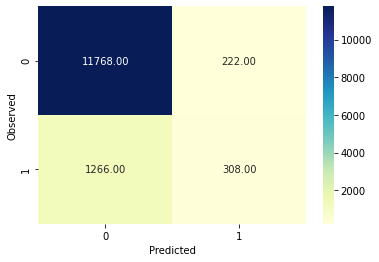

None 

Recall:  0.19567979669631513 

Precision:  0.5811320754716981 

F1 Score:  0.29277566539923955 

Roc Auc Score:  0.5885821835858557


In [45]:
#Checking all necessary metrics to see how good the model is
print('Training accuracy: ', lr_model.score(x_train,y_train), '\n')  
print('Testing accuracy: ', lr_model.score(x_test, y_test), '\n')
print('Confusion Matrix:')
print(heatmap_matrix(y_test,y_predict), '\n')
print("Recall: ", recall_score(y_test, y_predict), '\n')
print("Precision: ", precision_score(y_test, y_predict), '\n')
print("F1 Score: ", f1_score(y_test, y_predict), '\n')
print("Roc Auc Score: ", roc_auc_score(y_test, y_predict))

**Insights:** `There's a higher amount of false negatives than false than false positives. Training accuracy is 88%`

### Decision Tree

In [53]:
#Decision Tree algorithm
from sklearn.tree import DecisionTreeClassifier
#from sklearn.feature_extraction.text import CountVectorizer  #DT does not take strings as input for the model fit step....
from IPython.display import Image  
#import pydotplus as pydot
from sklearn import tree
from os import system

dTree = DecisionTreeClassifier(criterion = 'gini', random_state=12)
dTree.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=12, splitter='best')

Training accuracy:  1.0 

Testing accuracy:  0.8713506340312592 

Confusion Matrix:


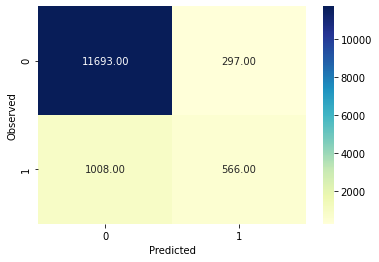

None 

Recall:  0.3595933926302414 

Precision:  0.6558516801853997 

F1 Score:  0.46450553959786617 

Roc Auc Score:  0.6674113752142034


In [91]:
#Decision Tree score
print('Training accuracy: ', dTree.score(x_train,y_train), '\n')  
print('Testing accuracy: ', dTree.score(x_test, y_test), '\n')
print('Confusion Matrix:')
print(heatmap_matrix(y_test,y_predict), '\n')
print("Recall: ", recall_score(y_test, y_predict), '\n')
print("Precision: ", precision_score(y_test, y_predict), '\n')
print("F1 Score: ", f1_score(y_test, y_predict), '\n')
print("Roc Auc Score: ", roc_auc_score(y_test, y_predict))

**Insights:** `The decisions tree model seems to be overfitting the data.`

In [63]:
#Regularization on the decision tree
dTreeR = DecisionTreeClassifier(criterion = 'gini', max_depth = 3, random_state=12)
dTreeR.fit(x_train, y_train)
print(dTreeR.score(x_train, y_train))
print(dTreeR.score(x_test, y_test))

0.9009700761525579
0.9017988793866116


**Insights:** `The model now fits the data better since the test and training score is close.`

Confusion Matrix:


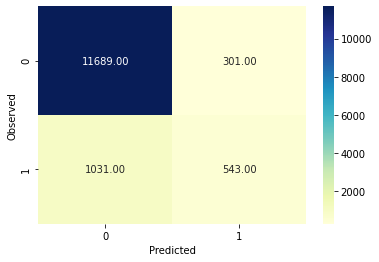

None 

Recall:  0.34498094027954257 

Precision:  0.6433649289099526 

F1 Score:  0.4491315136476427 

Roc Auc Score:  0.6599383433674609


In [93]:
#Score of the regularized model
y_predict = dTreeR.predict(x_test)

print('Confusion Matrix:')
print(heatmap_matrix(y_test,y_predict), '\n')
print("Recall: ", recall_score(y_test, y_predict), '\n')
print("Precision: ", precision_score(y_test, y_predict), '\n')
print("F1 Score: ", f1_score(y_test, y_predict), '\n')
print("Roc Auc Score: ", roc_auc_score(y_test, y_predict))

**Insights:** `The false negatives are higher than the false positives in this model and the model accuracy is similar to the logistic regression model.`

### Bagging

In [77]:
#Bagging
from sklearn.ensemble import BaggingClassifier

bgcl = BaggingClassifier(base_estimator=dTree, n_estimators=50,random_state=12)
bgcl = bgcl.fit(x_train, y_train)

Training accuracy:  0.999715612854299 

Testing accuracy:  0.9031259215570628 

Confusion Matrix:


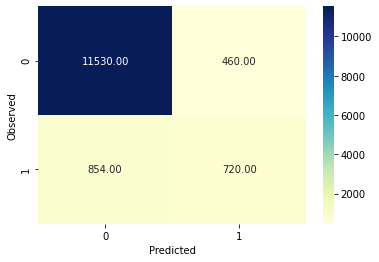

None 

Recall:  0.45743329097839897 

Precision:  0.6101694915254238 

F1 Score:  0.522875816993464 

Roc Auc Score:  0.7095339932790243


In [92]:
#Checking the preformance

y_predict = bgcl.predict(x_test)

print('Training accuracy: ', bgcl.score(x_train,y_train), '\n')  
print('Testing accuracy: ', bgcl.score(x_test, y_test), '\n')
print('Confusion Matrix:')
print(heatmap_matrix(y_test,y_predict), '\n')
print("Recall: ", recall_score(y_test, y_predict), '\n')
print("Precision: ", precision_score(y_test, y_predict), '\n')
print("F1 Score: ", f1_score(y_test, y_predict), '\n')
print("Roc Auc Score: ", roc_auc_score(y_test, y_predict))

**Insights:** `The model may be slightly overfitting but the amount of false positives and false negatives is lower compared to previous models.`

### AdaBoost

In [79]:
#Building the model
from sklearn.ensemble import AdaBoostClassifier
abcl = AdaBoostClassifier(n_estimators=10, random_state=12)
abcl = abcl.fit(x_train, y_train)

Training accuracy:  0.8925016589250165 

Testing accuracy:  0.893246829843704 

Confusion Matrix:


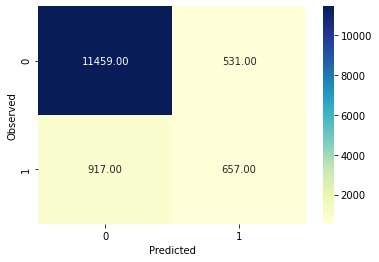

None 

Recall:  0.41740787801778906 

Precision:  0.553030303030303 

F1 Score:  0.4757422157856626 

Roc Auc Score:  0.6865604861314967


In [94]:
#Checking AdaBoost performance
y_predict = abcl.predict(x_test)
print('Training accuracy: ', abcl.score(x_train,y_train), '\n')  
print('Testing accuracy: ', abcl.score(x_test, y_test), '\n')
print('Confusion Matrix:')
print(heatmap_matrix(y_test,y_predict), '\n')
print("Recall: ", recall_score(y_test, y_predict), '\n')
print("Precision: ", precision_score(y_test, y_predict), '\n')
print("F1 Score: ", f1_score(y_test, y_predict), '\n')
print("Roc Auc Score: ", roc_auc_score(y_test, y_predict))

**Insights:** `Accuracy between the testing and training models are very close. The model seems to be a good fit for the data.`

### GradientBoost

In [85]:
#Building the model

from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(n_estimators = 50,random_state=12)
gbcl = gbcl.fit(x_train, y_train)

Training accuracy:  0.9053306790533068 

Testing accuracy:  0.9037894426422884 

Confusion Matrix:


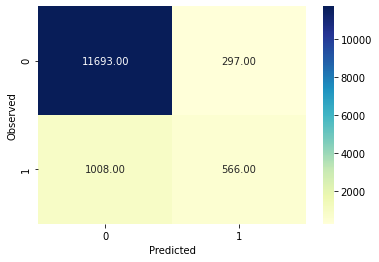

None 

Recall:  0.3595933926302414 

Precision:  0.6558516801853997 

F1 Score:  0.46450553959786617 

Roc Auc Score:  0.6674113752142034


In [95]:
y_predict = gbcl.predict(x_test)

print('Training accuracy: ', gbcl.score(x_train,y_train), '\n')  
print('Testing accuracy: ', gbcl.score(x_test, y_test), '\n')

print('Confusion Matrix:')
print(heatmap_matrix(y_test,y_predict), '\n')
print("Recall: ", recall_score(y_test, y_predict), '\n')
print("Precision: ", precision_score(y_test, y_predict), '\n')
print("F1 Score: ", f1_score(y_test, y_predict), '\n')
print("Roc Auc Score: ", roc_auc_score(y_test, y_predict))

**Insights:** `Testing and training model performance is similar. The number of false negatives is higher than false positives.`

## Conclusion

Based on the performance of the models, it seems that the Bagging method is the best. Looking at the Confusion Matrix:

- **True Positive:** Those who would subscribe to tram deposit and have done so. 
- **True Negative:** Those who wouldn't subscribe to term deposit and did not.
- **False Positive:** Those who were predicted to subscribe to term deposit but they actually didn't.
- **False Negative:** Those who were predicted to not subscribe to term deposit and did.

In the case of our goal, we would like to have more false negatives than false positives because the results would exceed expectations. For that reason, it is important to factor the weight of the Recall score. Recall will tell us of those who were identified to subscribe term deposit, what is the fraction of those who were correctly identified? This will ensure that we are getting the most accurate prediction of who will subscribe. The Bagging model has the highest Recall and also the highest training and testing scores even though the data may be slightly overfitting. Based on an initial comparison to other models, perhaps it can be improved in further steps. 